# Cook's Distance for Influential Point Detection

Cook’s distance is a measure computed to measure the influence exerted by each datapoint on the trained model. It is measured by building a regression model and therefore is impacted only by the X variables included in the model. 

## What is Cooks Distance?

Cook's distance represents the influence exerted by each data point (row) on the predicted outcome.

The cook’s distance for each observation 'i' measures the change in Ŷ  (fitted Y) for all observations with and without the presence of observation 'i', so we know how much the observation 'i' impacted the fitted values. 

So you build a model with and without the observation 'i' in the dataset and see how much the predicted values of all other observations change.

Mathematically, cook’s distance Di for observation i is computed as:

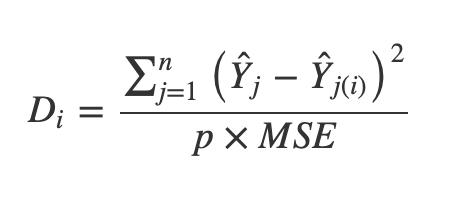

where,

- Ŷ j is the value of jth fitted response when all the observations are included.
- Ŷ j(i) is the value of jth fitted response, where the fit does not include observation i.
- MSE is the mean squared error.
- p is the number of coefficients in the regression model.

## Pros and Cons

__Pros:__

1. Considers all variables in the model when calling out influential points.
2. Formula based, intuitive to understand.

   
__Cons:__

1. To compute Cook's distance of each row, it requires the model to be retrained. So, computationally expensive to apply this method to other algorithms besides linear regression.


## Let's Compute Cook's distance in Python.

It can be directly computed using the Statsmodels package. But first, let's build the regression model.


####  Step 1: Prepare Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(filename, names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


__Data cleaning__

In [14]:
df = df.loc[:, ['symboling', 'wheel-base', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']]
df = df.replace('?', np.nan)
df = df.dropna()
df.reset_index(drop = True, inplace = True)
df.head()

,symboling,wheel-base,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,88.6,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,88.6,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,94.5,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,99.8,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,99.4,136,3.19,3.40,8.0,115,5500,18,22,17450


#### Step 2 : Train linear regression model

In [15]:
import statsmodels.api as sm

#define response variable
y = df['price']

#define explanatory variable
x = df[['symboling', 'wheel-base', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']]

__Build the linear regression model.__

In [16]:
#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y.astype(float), x.astype(float)).fit() 

#### Step 3 : Calculate Cook's distance

In [17]:
#suppress scientific notation
import numpy as np
np.set_printoptions(suppress=True)

#create instance of influence
influence = model.get_influence()

__Get the influence (Cook's distance) scores__

In [18]:
#obtain Cook's distance for each observation
cooks = influence.cooks_distance

#display Cook's distances
print(cooks)

(array([0.00005047, 0.00794651, 0.00235295, 0.00115412, 0.00229406,
       0.00001475, 0.00040342, 0.00195747, 0.03696988, 0.00405958,
       0.00509101, 0.00570949, 0.00620111, 0.01803001, 0.00335913,
       0.07252824, 0.02556543, 0.04585015, 0.00000023, 0.00011847,
       0.00000804, 0.00001075, 0.00001616, 0.00002787, 0.00000096,
       0.00017893, 0.00003149, 0.00153593, 0.00321647, 0.05605546,
       0.00023964, 0.0002776 , 0.00017649, 0.00000042, 0.00005717,
       0.00005307, 0.00111793, 0.00011928, 0.00024373, 0.00013439,
       0.00343908, 0.00001979, 0.00038317, 0.00006676, 0.00001466,
       0.01387144, 0.67290488, 0.00029421, 0.00003223, 0.00022211,
       0.00018456, 0.00050611, 0.00026183, 0.00039154, 0.000035  ,
       0.0000165 , 0.00224472, 0.00031293, 0.00134812, 0.01269743,
       0.00220525, 0.01360418, 0.01752224, 0.03048843, 0.00608054,
       0.0820174 , 0.00601548, 0.06747548, 0.00295536, 0.00032691,
       0.00016934, 0.00003394, 0.00003416, 0.00056306, 0.0015

#### Step 4: Visualize the cook's distance and find influencial points

The rows which have cook's distance greater than 4x of mean cook's distance are known as influencial points 

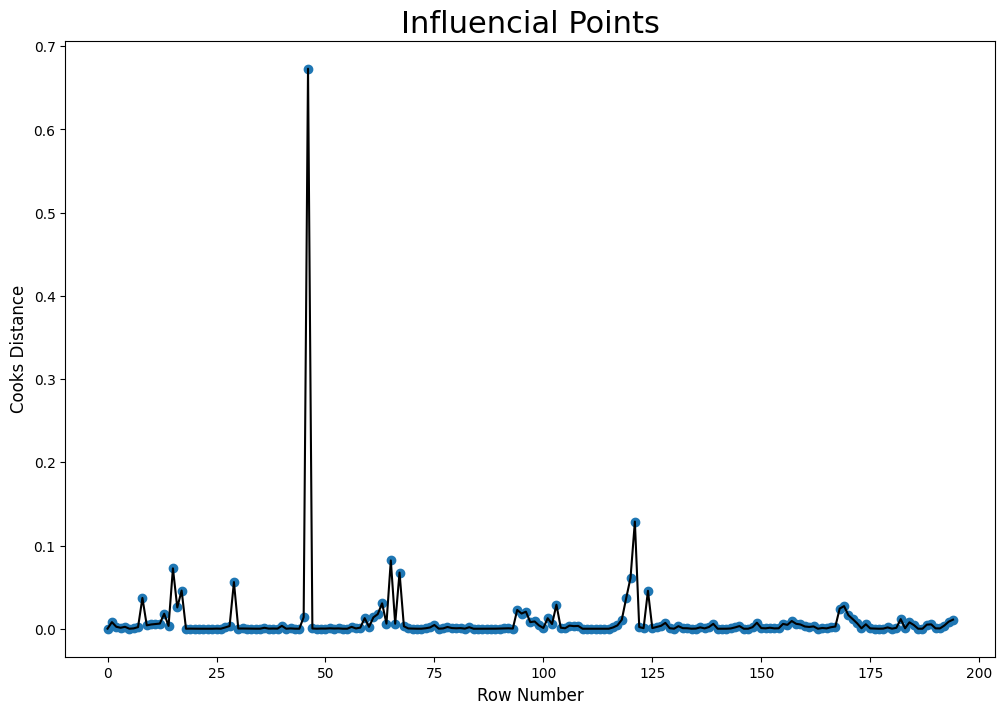

In [19]:
# Draw plot
plt.figure(figsize = (12, 8))
plt.scatter(df.index, cooks[0])
plt.plot(df.index, cooks[0], color='black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

__Mean Cook's distance__

In [20]:
mean_cooks = np.mean(cooks[0])
mean_cooks

0.00990911857380304

In [21]:
mean_cooks_list = [4*mean_cooks for i in df.index]
# mean_cooks_list

__Visualize the Influence scores__

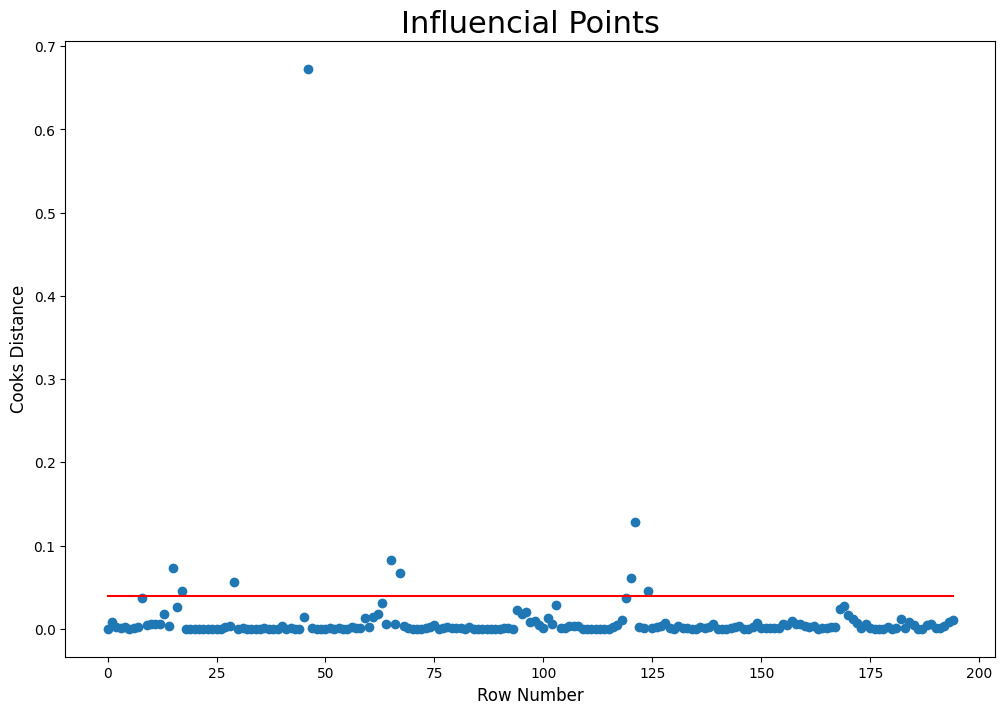

In [22]:
# Draw plot
plt.figure(figsize = (12, 8))
plt.scatter(df.index, cooks[0])
plt.plot(df.index, mean_cooks_list, color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

In [23]:
# Influencial points
influencial_points = df.index[cooks[0] > 4*mean_cooks]
influencial_points

Int64Index([15, 17, 29, 46, 65, 67, 120, 121, 124], dtype='int64')

In [24]:
df.iloc[influencial_points, :]

,symboling,wheel-base,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
15,0,103.5,209,3.62,3.39,8.0,182,5400,16,22,41315
17,2,88.4,61,2.91,3.03,9.5,48,5100,47,53,5151
29,2,86.6,92,2.91,3.41,9.6,58,4800,49,54,6479
46,0,102.0,326,3.54,2.76,11.5,262,5000,13,17,36000
65,3,96.6,234,3.46,3.10,8.3,155,4750,16,18,35056
67,1,112.0,304,3.80,3.35,8.0,184,4500,14,16,45400
120,3,89.5,194,3.74,2.90,9.5,207,5900,17,25,34028
121,3,89.5,194,3.74,2.90,9.5,207,5900,17,25,37028
124,3,99.1,121,2.54,2.07,9.3,110,5250,21,28,15040


__Let's look at non influential points as well__

When you compare, some features of the influential data points are towards an extreme.

In [25]:
# Non Influencial points
noninfluencial_points = df.index[cooks[0] < 4*mean_cooks]
noninfluencial_points
df.iloc[noninfluencial_points, :].head()

,symboling,wheel-base,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,88.6,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,88.6,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,94.5,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,99.8,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,99.4,136,3.19,3.40,8.0,115,5500,18,22,17450
